In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
tickers = ["FB", "IBM"]

df_list = []
for ticker in tickers:
    df = pd.read_csv("ticker-" + ticker.lower() + ".csv", index_col=0, parse_dates=True)
    df_list.append(df['Adj Close'])

data = pd.concat(df_list, axis=1)
data.columns = tickers

In [3]:
log_return = np.log(data/data.shift())

In [4]:
n = 1000

weights = np.zeros((n, 2))
returns = np.zeros(n)
volatilities = np.zeros(n)

for i in range(n):
    weight = np.random.random(2)
    weight /= weight.sum()
    
    weights[i] = weight
    returns[i] = np.sum(weight * log_return.mean() * 252)
    volatilities[i] = np.sqrt(np.dot(weight.T, np.dot(log_return.cov() * 252, weight)))

<IPython.core.display.Javascript object>


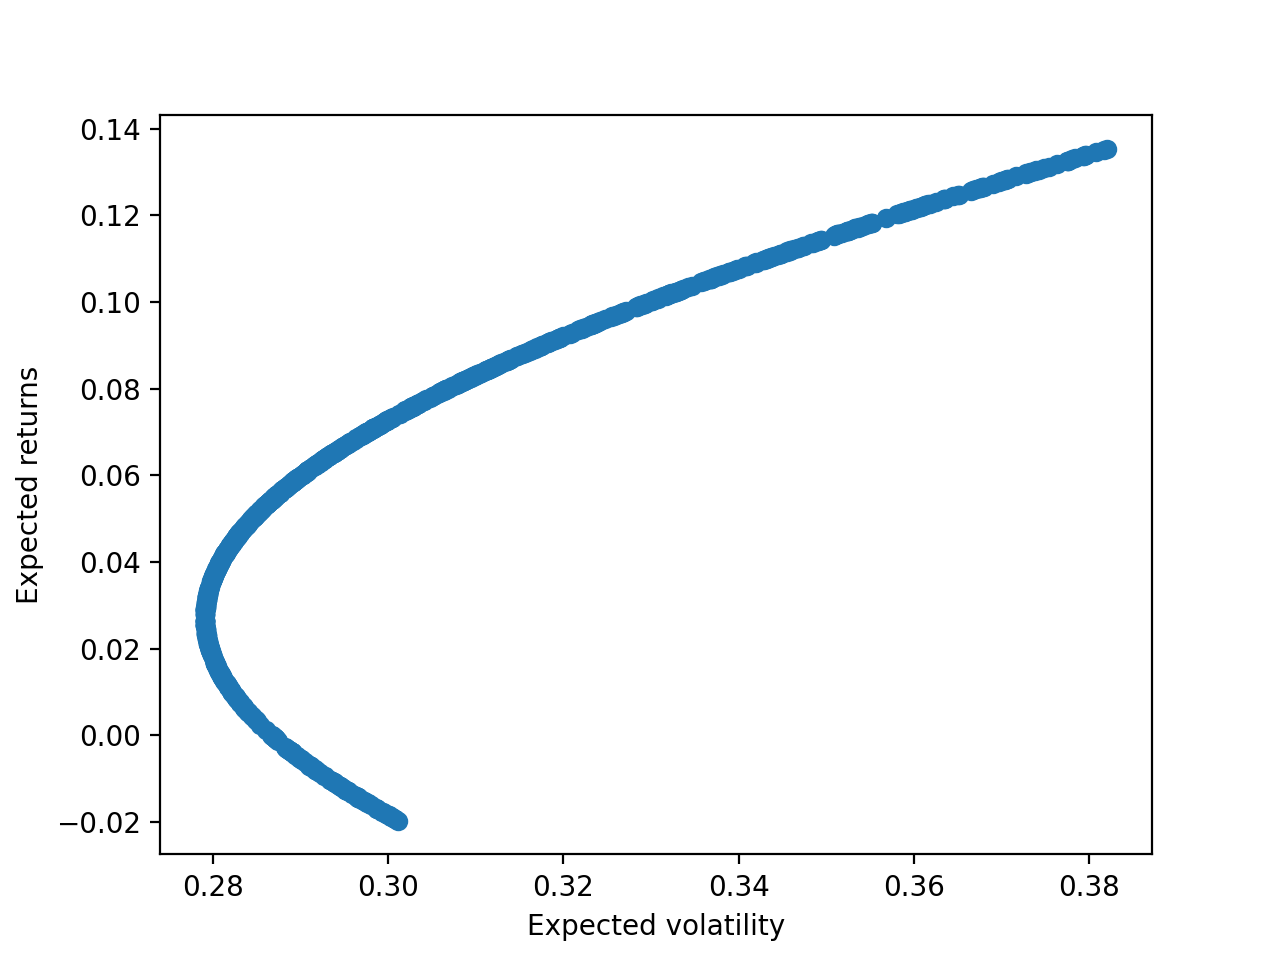

Text(0, 0.5, 'Expected returns')

In [5]:
fig, ax = plt.subplots()
ax.scatter(volatilities, returns)
ax.set_xlabel('Expected volatility')
ax.set_ylabel('Expected returns')

In [6]:
volatilities.argmin()

436

In [7]:
weights[volatilities.argmin()]

array([0.3059863, 0.6940137])

In [8]:
weights[returns.argmin()]

array([0.00375237, 0.99624763])

In [9]:
weights[returns.argmax()]

array([0.99230518, 0.00769482])